In [1]:
# Import modelflow

%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
from ipywidgets import interact,Dropdown,Checkbox
from IPython.display import display, clear_output,Latex, Markdown
import pandas as pd

import modelmf
import modeljupyter as mj
from modelvis import waterplot

from modelinvert import targets_instruments
from modelclass import model
model.widescreen()

model.scroll_off()

In [5]:
# Load model and data, and run 

if not 'masia' in locals():
    print('Load model')
    masia,baseline = model.modelload('Asia_sep7.pcim',run=1,silent=1,progressbar=1)
from inject import inject
inject(masia)  
masia.lastdf = masia.basedf.copy()

Load model


In [11]:
instruments = [[f'BRN_GCARBR_A']]
target_var  = 'BRN_CO2'
delay = 6
target_growth = -1.

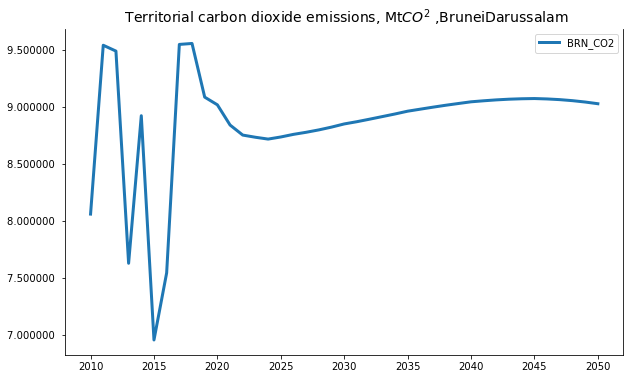

In [7]:
model.plot_basis(target_var,df = masia.basedf.loc[2010:,[target_var]],trans=masia.var_description);

In [8]:
experiment = baseline.copy()
experiment.loc[2022,instruments[0]]= experiment.loc[2022,instruments[0]] + 10 
result = masia(experiment,progressbar = 1)

Solving Asia_7sept:   0%|          | 0/30

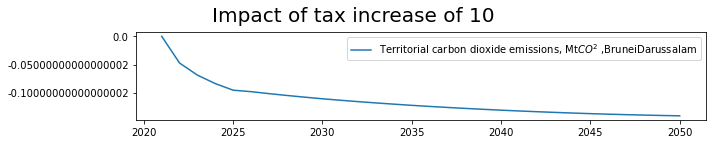

In [9]:
masia[target_var].dif.rename().plot(colrow  = 1,title = 'Impact of tax increase of 10 ',top=0.8);
masia[target_var].dif.df;
    

      Business as usual  Target
2027                NaN     NaN
2028           0.002394   -0.01
2029           0.002776   -0.01
2030           0.003159   -0.01
2031           0.002224   -0.01
2032           0.002490   -0.01
2033           0.002559   -0.01
2034           0.002565   -0.01
2035           0.002754   -0.01
2036           0.001982   -0.01
2037           0.001963   -0.01
2038           0.001858   -0.01
2039           0.001703   -0.01
2040           0.001662   -0.01
2041           0.000999   -0.01
2042           0.000878   -0.01
2043           0.000659   -0.01
2044           0.000417   -0.01
2045           0.000214   -0.01
2046          -0.000389   -0.01
2047          -0.000668   -0.01
2048          -0.000995   -0.01
2049          -0.001327   -0.01
2050          -0.001640   -0.01


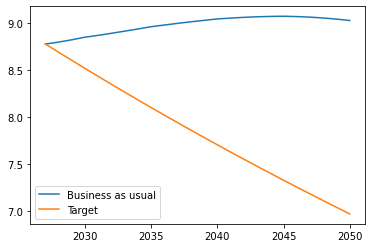

In [12]:
target_before = baseline[[target_var]].loc[2022+delay-1:,:]
target = target_before.mfcalc(f'{target_var} = {target_var}(-1) * (1+{target_growth}/100)')
t = pd.concat([target_before.rename(columns={target_var:'Business as usual'}),target.rename(columns={target_var:'Target'})],axis=1)
t.plot()
print(t.pct_change())

In [29]:
t_i_baseline = baseline.copy()
t_i = targets_instruments(databank=t_i_baseline,targets=target,instruments=instruments,
                          model=masia,DefaultImpuls=50.,defaultconv=0.01,varimpulse=True,nonlin=True)

In [30]:
t_i.debug=1
res = t_i(delay=delay)

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -8.395773e-11
Name: 2027, dtype: float64
OrgDistance :BRN_CO2   -8.395773e-11
Name: 2027, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.108815
Name: 2028, dtype: float64
OrgDistance :BRN_CO2   -0.108815
Name: 2028, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.368638
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.078286
Name: 2028, dtype: float64
OrgDistance :BRN_CO2    0.078286
Name: 2028, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.265212
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.053446
Name: 2028, dtype: float64
OrgDistance :BRN_CO2   -0.053446
Name: 2028, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.18106
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.037967
Name: 2028, dtype: float64
OrgDistance :BRN_CO2    0.037967
Name: 2028, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.128623
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.026279
Name: 2028, dtype: float64
OrgDistance :BRN_CO2   -0.026279
Name: 2028, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.089028
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.018538
Name: 2028, dtype: float64
OrgDistance :BRN_CO2    0.018538
Name: 2028, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.062802
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.01291
Name: 2028, dtype: float64
OrgDistance :BRN_CO2   -0.01291
Name: 2028, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.043736
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.009074
Name: 2028, dtype: float64
OrgDistance :BRN_CO2    0.009074
Name: 2028, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.098855
Name: 2029, dtype: float64
OrgDistance :BRN_CO2   -0.098855
Name: 2029, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.357522
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.063772
Name: 2029, dtype: float64
OrgDistance :BRN_CO2    0.063772
Name: 2029, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.23064
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.038698
Name: 2029, dtype: float64
OrgDistance :BRN_CO2   -0.038698
Name: 2029, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.139957
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.024477
Name: 2029, dtype: float64
OrgDistance :BRN_CO2    0.024477
Name: 2029, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.088523
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.01511
Name: 2029, dtype: float64
OrgDistance :BRN_CO2   -0.01511
Name: 2029, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.054648
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.009475
Name: 2029, dtype: float64
OrgDistance :BRN_CO2    0.009475
Name: 2029, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.097775
Name: 2030, dtype: float64
OrgDistance :BRN_CO2   -0.097775
Name: 2030, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.38645
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.0602
Name: 2030, dtype: float64
OrgDistance :BRN_CO2    0.0602
Name: 2030, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.237939
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.034697
Name: 2030, dtype: float64
OrgDistance :BRN_CO2   -0.034697
Name: 2030, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.137139
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.02087
Name: 2030, dtype: float64
OrgDistance :BRN_CO2    0.02087
Name: 2030, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.082487
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.012258
Name: 2030, dtype: float64
OrgDistance :BRN_CO2   -0.012258
Name: 2030, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.048448
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.007305
Name: 2030, dtype: float64
OrgDistance :BRN_CO2    0.007305
Name: 2030, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.088272
Name: 2031, dtype: float64
OrgDistance :BRN_CO2   -0.088272
Name: 2031, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.368858
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.048607
Name: 2031, dtype: float64
OrgDistance :BRN_CO2    0.048607
Name: 2031, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.203114
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.024925
Name: 2031, dtype: float64
OrgDistance :BRN_CO2   -0.024925
Name: 2031, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.104154
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.013316
Name: 2031, dtype: float64
OrgDistance :BRN_CO2    0.013316
Name: 2031, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.055643
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.00697
Name: 2031, dtype: float64
OrgDistance :BRN_CO2   -0.00697
Name: 2031, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.101967
Name: 2032, dtype: float64
OrgDistance :BRN_CO2   -0.101967
Name: 2032, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.461918
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.054206
Name: 2032, dtype: float64
OrgDistance :BRN_CO2    0.054206
Name: 2032, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.245558
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.026422
Name: 2032, dtype: float64
OrgDistance :BRN_CO2   -0.026422
Name: 2032, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.119695
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.013519
Name: 2032, dtype: float64
OrgDistance :BRN_CO2    0.013519
Name: 2032, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.061241
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.00676
Name: 2032, dtype: float64
OrgDistance :BRN_CO2   -0.00676
Name: 2032, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.099025
Name: 2033, dtype: float64
OrgDistance :BRN_CO2   -0.099025
Name: 2033, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.471835
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.04664
Name: 2033, dtype: float64
OrgDistance :BRN_CO2    0.04664
Name: 2033, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.222229
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.01991
Name: 2033, dtype: float64
OrgDistance :BRN_CO2   -0.01991
Name: 2033, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.094865
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.008923
Name: 2033, dtype: float64
OrgDistance :BRN_CO2    0.008923
Name: 2033, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.079645
Name: 2034, dtype: float64
OrgDistance :BRN_CO2   -0.079645
Name: 2034, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.411322
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.03625
Name: 2034, dtype: float64
OrgDistance :BRN_CO2    0.03625
Name: 2034, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.187212
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.015213
Name: 2034, dtype: float64
OrgDistance :BRN_CO2   -0.015213
Name: 2034, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.078566
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.006634
Name: 2034, dtype: float64
OrgDistance :BRN_CO2    0.006634
Name: 2034, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.080602
Name: 2035, dtype: float64
OrgDistance :BRN_CO2   -0.080602
Name: 2035, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.437631
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.032712
Name: 2035, dtype: float64
OrgDistance :BRN_CO2    0.032712
Name: 2035, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.177614
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.012095
Name: 2035, dtype: float64
OrgDistance :BRN_CO2   -0.012095
Name: 2035, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.065668
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.004651
Name: 2035, dtype: float64
OrgDistance :BRN_CO2    0.004651
Name: 2035, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.0735
Name: 2036, dtype: float64
OrgDistance :BRN_CO2   -0.0735
Name: 2036, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.427476
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.028614
Name: 2036, dtype: float64
OrgDistance :BRN_CO2    0.028614
Name: 2036, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.166418
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.010202
Name: 2036, dtype: float64
OrgDistance :BRN_CO2   -0.010202
Name: 2036, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.059335
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.003769
Name: 2036, dtype: float64
OrgDistance :BRN_CO2    0.003769
Name: 2036, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.071802
Name: 2037, dtype: float64
OrgDistance :BRN_CO2   -0.071802
Name: 2037, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.437207
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.02496
Name: 2037, dtype: float64
OrgDistance :BRN_CO2    0.02496
Name: 2037, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.151984
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.007883
Name: 2037, dtype: float64
OrgDistance :BRN_CO2   -0.007883
Name: 2037, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.08074
Name: 2038, dtype: float64
OrgDistance :BRN_CO2   -0.08074
Name: 2038, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.522853
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.026903
Name: 2038, dtype: float64
OrgDistance :BRN_CO2    0.026903
Name: 2038, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.174219
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.008014
Name: 2038, dtype: float64
OrgDistance :BRN_CO2   -0.008014
Name: 2038, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.077344
Name: 2039, dtype: float64
OrgDistance :BRN_CO2   -0.077344
Name: 2039, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.522525
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.022785
Name: 2039, dtype: float64
OrgDistance :BRN_CO2    0.022785
Name: 2039, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.153934
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.005953
Name: 2039, dtype: float64
OrgDistance :BRN_CO2   -0.005953
Name: 2039, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.07271
Name: 2040, dtype: float64
OrgDistance :BRN_CO2   -0.07271
Name: 2040, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.506563
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.017836
Name: 2040, dtype: float64
OrgDistance :BRN_CO2    0.017836
Name: 2040, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.124261
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.003829
Name: 2040, dtype: float64
OrgDistance :BRN_CO2   -0.003829
Name: 2040, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.063242
Name: 2041, dtype: float64
OrgDistance :BRN_CO2   -0.063242
Name: 2041, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.470723
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.01544
Name: 2041, dtype: float64
OrgDistance :BRN_CO2    0.01544
Name: 2041, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.114919
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.003362
Name: 2041, dtype: float64
OrgDistance :BRN_CO2   -0.003362
Name: 2041, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.060146
Name: 2042, dtype: float64
OrgDistance :BRN_CO2   -0.060146
Name: 2042, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.465637
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.012972
Name: 2042, dtype: float64
OrgDistance :BRN_CO2    0.012972
Name: 2042, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.100429
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.00248
Name: 2042, dtype: float64
OrgDistance :BRN_CO2   -0.00248
Name: 2042, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.055946
Name: 2043, dtype: float64
OrgDistance :BRN_CO2   -0.055946
Name: 2043, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.447851
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.010286
Name: 2043, dtype: float64
OrgDistance :BRN_CO2    0.010286
Name: 2043, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A   -0.082343
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.001663
Name: 2043, dtype: float64
OrgDistance :BRN_CO2   -0.001663
Name: 2043, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.05177
Name: 2044, dtype: float64
OrgDistance :BRN_CO2   -0.05177
Name: 2044, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.438804
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.009466
Name: 2044, dtype: float64
OrgDistance :BRN_CO2    0.009466
Name: 2044, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.037231
Name: 2045, dtype: float64
OrgDistance :BRN_CO2   -0.037231
Name: 2045, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.32663
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.005784
Name: 2045, dtype: float64
OrgDistance :BRN_CO2    0.005784
Name: 2045, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.035524
Name: 2046, dtype: float64
OrgDistance :BRN_CO2   -0.035524
Name: 2046, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.321554
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.004724
Name: 2046, dtype: float64
OrgDistance :BRN_CO2    0.004724
Name: 2046, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.033675
Name: 2047, dtype: float64
OrgDistance :BRN_CO2   -0.033675
Name: 2047, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.313759
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.003728
Name: 2047, dtype: float64
OrgDistance :BRN_CO2    0.003728
Name: 2047, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.031541
Name: 2048, dtype: float64
OrgDistance :BRN_CO2   -0.031541
Name: 2048, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.300551
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.002672
Name: 2048, dtype: float64
OrgDistance :BRN_CO2    0.002672
Name: 2048, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.029574
Name: 2049, dtype: float64
OrgDistance :BRN_CO2   -0.029574
Name: 2049, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.288306
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.001831
Name: 2049, dtype: float64
OrgDistance :BRN_CO2    0.001831
Name: 2049, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2   -0.02765
Name: 2050, dtype: float64
OrgDistance :BRN_CO2   -0.02765
Name: 2050, dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Solving Asia_7sept:   0%|          | 0/7

BRN_GCARBR_A    0.275659
dtype: float64


Solving Asia_7sept:   0%|          | 0/7

Distance    :BRN_CO2    0.00114
Name: 2050, dtype: float64
OrgDistance :BRN_CO2    0.00114
Name: 2050, dtype: float64


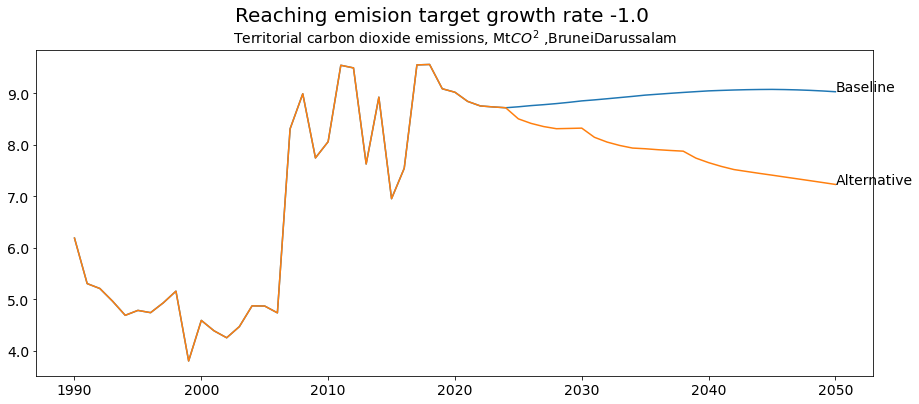

In [24]:
with masia.set_smpl(1990,2050):

    masia[target_var].rename().plot_alt(title=f'Reaching emision target growth rate {target_growth:,.1f}');

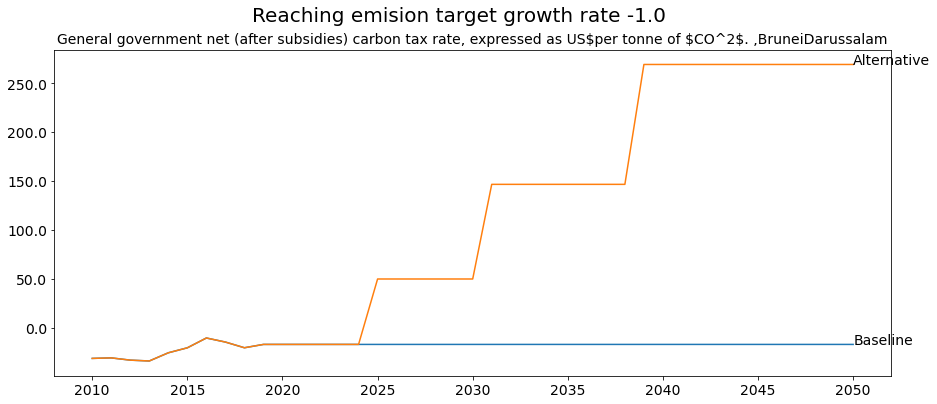

In [25]:
with masia.set_smpl(1990,2050):
    masia['brn_GCARBR'].rename().plot_alt(title=f'Reaching emision target growth rate {target_growth:,.1f}');

In [22]:
masia['IDN_share*'].df

,IDN_SHAREE,IDN_SHAREE_A,IDN_SHAREH,IDN_SHAREH_A,IDN_SHARESP,IDN_SHARESP_A,IDN_SHAREX,IDN_SHAREX_A
2021,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2022,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2023,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2024,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2025,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2026,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2027,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2028,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2029,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25
2030,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


# Tax in each country 

In [26]:
masia.exodif().rename(columns=masia.var_description).T

,2025,2031,2039
"Add factor:General government net (after subsidies) carbon tax rate, expressed as US$per tonne of $CO^2$. ,BruneiDarussalam",66.875785,96.741677,122.549771


# World reduction 

# ASEAN reduction

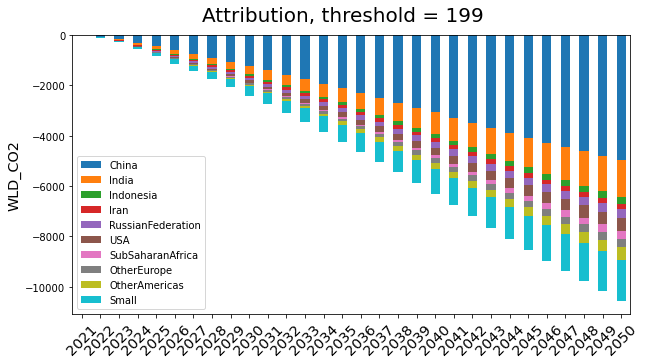

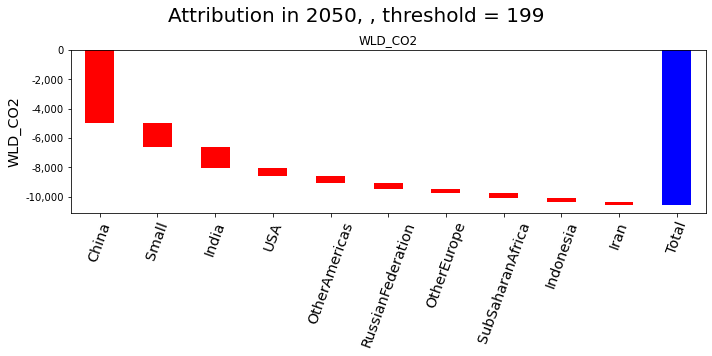

In [17]:

    Threshold =199
    masia.dekomp_plot('WLD_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('WLD_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get);


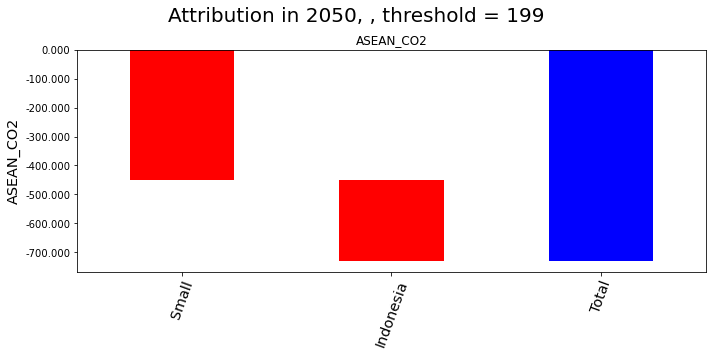

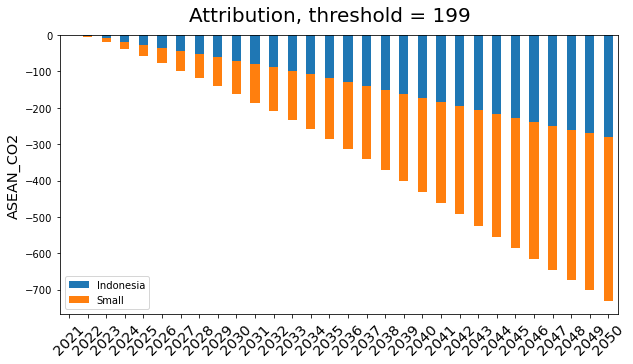

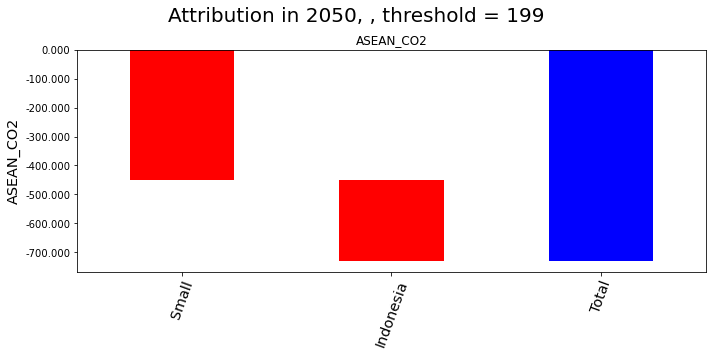

In [18]:
    masia.dekomp_plot('ASEAN_CO2',pct=0,threshold=Threshold,nametrans=masia.country_get)
    masia.dekomp_plot_per('ASEAN_CO2',pct=0,threshold=Threshold,per=2050,sort=True,nametrans=masia.country_get)


# not used  

In [19]:
co2_input_var = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2')]
co2_input_var_asean = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2') 
                       and  var.split('_')[0] in masia.countries_ASEAN ]

In [20]:
co2_baseline = baseline.loc[:,co2_input_var].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))
co2_baseline_asean = baseline.loc[:,co2_input_var_asean].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))